In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/microchips.csv')

In [ ]:
df.head()

,feature 1,feature 2,pass = 1
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
X = df[['feature 1','feature 2']].values
y = df['pass = 1'].values

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.3,random_state=4)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5)

In [ ]:
def powers(X,d):
  X_p = X
  for k in range(2,d+1):
    for s in range(k+1):
      X_p = np.c_[X_p,X[:,0]**(k-s)*X[:,1]**s]
  return X_p  

In [ ]:
d = 8
X_train_p = powers(X_train,d)  
X_val_p = powers(X_val,d)  
X_test_p = powers(X_test,d)  

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_p)
X_train_scaled = scaler.transform(X_train_p)
X_val_scaled = scaler.transform(X_val_p)
X_test_scaled = scaler.transform(X_test_p)

In [ ]:
0.71/82

0.008658536585365853

0.006
1/1 [==============================] - 0s 16ms/step - loss: 0.4865
0.007
1/1 [==============================] - 0s 16ms/step - loss: 0.4856
0.008
1/1 [==============================] - 0s 16ms/step - loss: 0.4842
0.009000000000000001
1/1 [==============================] - 0s 19ms/step - loss: 0.4825
0.01
1/1 [==============================] - 0s 16ms/step - loss: 0.4827
0.011
1/1 [==============================] - 0s 15ms/step - loss: 0.4840
0.012
1/1 [==============================] - 0s 20ms/step - loss: 0.4840
0.013000000000000001
1/1 [==============================] - 0s 17ms/step - loss: 0.4848
0.014
1/1 [==============================] - 0s 19ms/step - loss: 0.4864
0.015000000000000001
1/1 [==============================] - 0s 18ms/step - loss: 0.4864


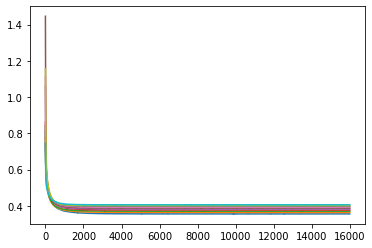

In [ ]:
las = np.arange(0.006,0.016,0.001)
J_val = np.empty(0)
J_train = np.empty(0)
for la in las:
  print(la)
  model = Sequential()
  model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(la)))
  model.compile(optimizer='SGD',loss='binary_crossentropy')
  model.fit(X_train_scaled,y_train,epochs=16000,verbose=0)
  J_list = model.history.history['loss']
  plt.plot(J_list)
  J_train = np.append(J_train,model.evaluate(X_train_scaled,y_train))
  J_val = np.append(J_val,model.evaluate(X_val_scaled,y_val))

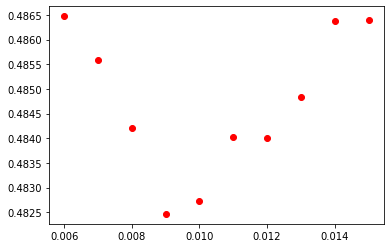

In [ ]:
plt.plot(las,J_val,'ro')
#plt.plot(las,J_train,'ko')

In [ ]:
len(y_train)

82

In [ ]:
0.71/82

0.008658536585365853